In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#時間の単位はsに統一
#電位はmVに統一

dt = 5e-5         #時間間隔(s)
T = 0.4           #測定時間(s)
nt = round(T/dt)  #ステップ数 
tref = 2e-3       #不応期(s)
tc_m = 1e-2       #膜時定数(s)
vrest = -60       #静止膜電位(mV)
vreset = -65      #リセット電位(mV)
vthr = -40        #閾値電位(mV)
vpeak = 30        #ピーク電位(mV)

t = np.arange(nt)*dt  #時間配列(s)
I = 25*(t>0.05) - 25*(t>0.35)#入力電流(膜抵抗を乗じた後)(mV)

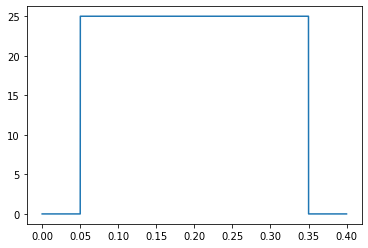

In [3]:
plt.plot(t, I)

In [4]:
#初期値
v = vrest         #膜電位の初期値(mV)
tlast = 0         #最後にスパイクが生成された時間
v_arr = np.zeros(nt)#膜電位変化を記録

In [5]:
for i in range(nt):
    dvdt = (vrest - v + I[i]) / tc_m
    #不応期の条件(最終発火時刻+不応期 < 現在時刻)で発火
    if dt * i > tlast + tref:
        v = v + dvdt*dt #更新
    #発火の確認(発火, flag == 1 発火していない, flag == 0)
    flag = 1 if (v >= vthr) else 0
    tlast = tlast*(1-flag) + dt*i*flag  #発火時刻更新
    v = v*(1-flag) + vpeak*flag        #発火閾値に達した場合peakに更新
    v_arr[i] = v  #膜電位保存
    v = v*(1-flag) + vreset*flag  #発火時に電位をリセット

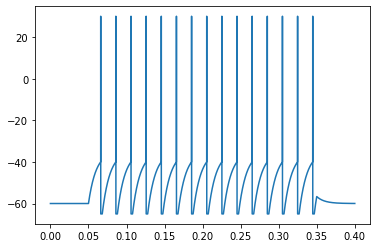

In [6]:
plt.plot(t, v_arr)